Data augmentation (vid01  Jan 2017 Oackland - WhiteLaneTrack clockwise)
# folder
dataWhiteTrack/vid01

In [98]:
import cv2
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [99]:
vid1_dir = 'dataWhiteTrack/vid01/'


log_vid1 = []

with open(vid1_dir+'labels.csv', 'r') as csvfile:
    data_vid1 = csv.reader(csvfile, delimiter=',')
    for row in data_vid1:
        log_vid1.append(row)

log_vid1 = np.array(log_vid1)

print('Example of log file data: img_fname {} | steering {} | throttle {}'.format(*log_vid1[0]))

print('Dataset size (vid1): {}'.format(len(log_vid1)))

Example of log file data: img_fname img00001.jpg | steering 69 | throttle 99
Dataset size (vid1): 3633


# Statistics Steering angle

Max Steering Value 196.0 | Min: 30.0


DescribeResult(nobs=65, minmax=(array([ 30.,   1.]), array([ 196.,  511.])), mean=array([ 90.66153846,  55.89230769]), variance=array([  940.69615385,  8816.34759615]), skewness=array([ 1.04891132,  3.10247684]), kurtosis=array([  2.5485549 ,  10.46543338]))

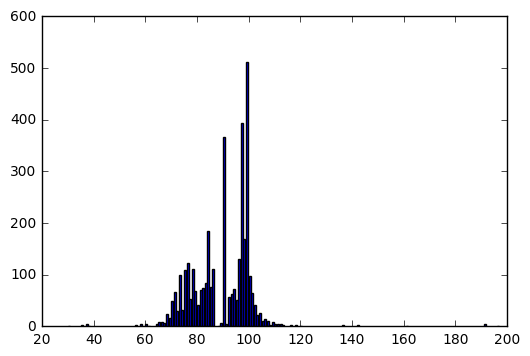

In [100]:
label_st = log_vid1[:,1].astype('float')

def count(data):
    
    #Get frequency of unique values in data
    #data: list or array
    #output an array: [[value, count],...]
    
    unique = np.unique(data)
    hist_data = []
    for item in unique:
        hist_data.append([item, np.sum(data == item)])
    return np.array(hist_data)

freq = count(label_st)
plt.bar(freq[:,0], freq[:,1])
print('Max Steering Value {} | Min: {}'.format(np.max(label_st), np.min(label_st)))

stats.describe(freq)

Max Steering Value 999.0 | Min: 91.0


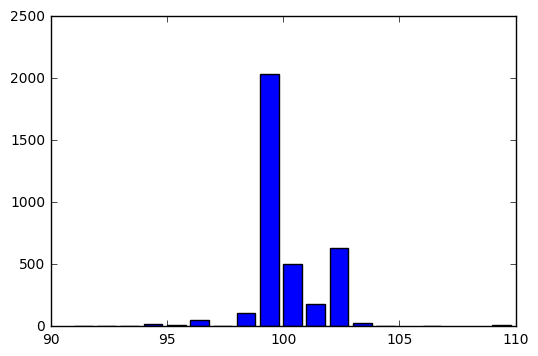

In [107]:
label_th = log_vid1[:,2].astype('float')

def count(data):
    
    #Get frequency of unique values in data
    #data: list or array
    #output an array: [[value, count],...]
    
    unique = np.unique(data)
    hist_data = []
    for item in unique:
        hist_data.append([item, np.sum(data == item)])
    return np.array(hist_data)

freq = count(label_th)
plt.bar(freq[:,0], freq[:,1])
plt.xlim([90,110])

print('Max Steering Value {} | Min: {}'.format(np.max(label_th), np.min(label_th)))


# show random images

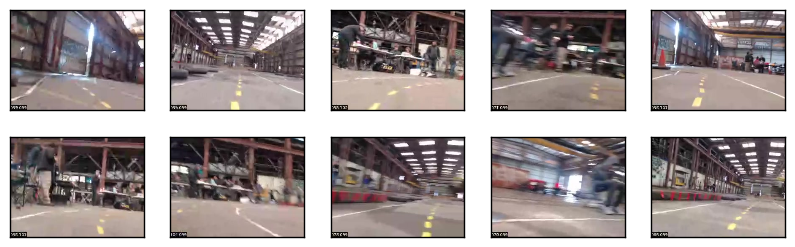

In [26]:
idx_list = np.random.randint(0, len(log_vid1), size=10)

col, row = [0, 0]
_, ax = plt.subplots(2, 5, figsize=(10, 3))
for i, idx in enumerate(idx_list):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    if col == 4:
        col, row = 0, row+1
    else:
        col = col + 1
plt.show()

In [ ]:
# Convert to YCrCb

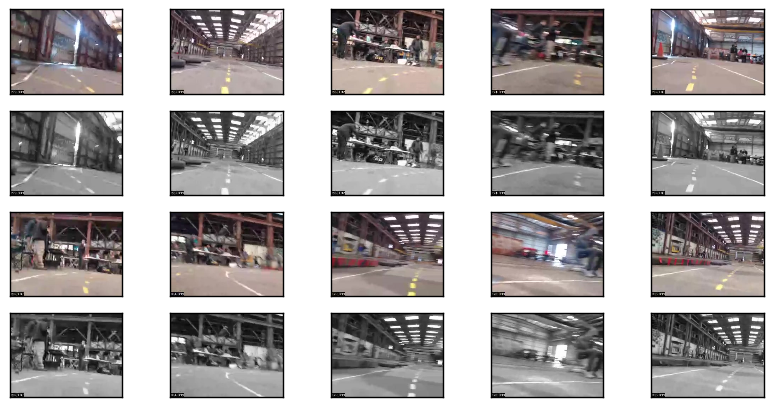

Pixel intensity Max: 255 | Min 0


In [48]:
col, row = [0, 0]
_, ax = plt.subplots(4, 5, figsize=(10, 5))
for i, idx in enumerate(idx_list):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img_rgb)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)[:,:,0]
    ax[row+1, col].imshow(img_gray, cmap='gray')
    ax[row+1, col].set_xticks([])
    ax[row+1, col].set_yticks([])
    
    if col == 4:
        col, row = 0, row+2
    else:
        col = col + 1
plt.show()

print('Pixel intensity Max: {} | Min {}'.format(np.max(img), np.min(img)))

# Apply crop as in config.py
    img_yaxis_start = 140
    img_yaxis_end = 227
    img_height = img_yaxis_end - img_yaxis_start + 1
    # image x-axis cropping
    img_xaxis_start = 0
    img_xaxis_end = 319
    img_width = img_xaxis_end - img_yaxis_start + 1
    # image resampling dimensions
    img_resample_dim = (180,180)
    
    
img_yaxis_start = **150**
img_yaxis_end = 227

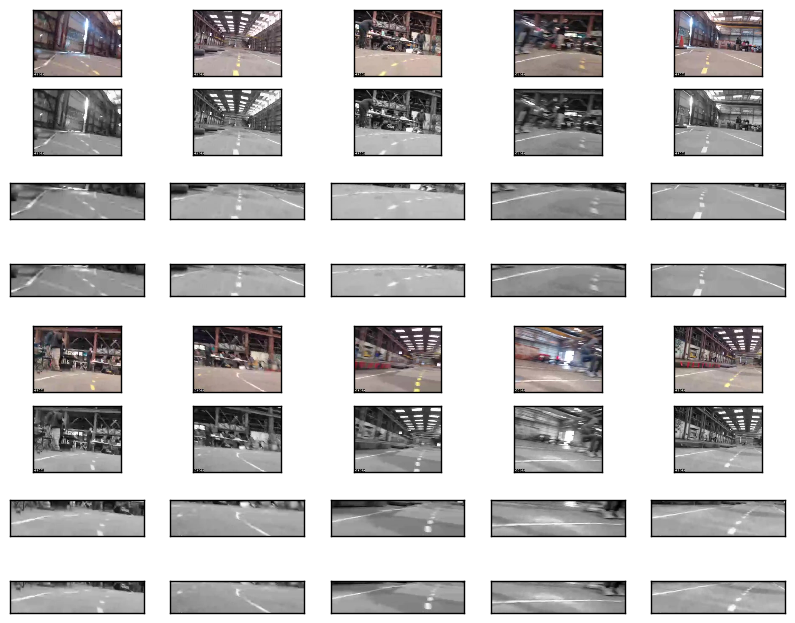

In [49]:
col, row = [0, 0]
_, ax = plt.subplots(8, 5, figsize=(10, 8))
for i, idx in enumerate(idx_list):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img_rgb)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)[:,:,0]
    ax[row+1, col].imshow(img_gray, cmap='gray')
    ax[row+1, col].set_xticks([])
    ax[row+1, col].set_yticks([])
    
    img_gray_crop = img_gray[140:227, :]
    ax[row+2, col].imshow(img_gray_crop, cmap='gray')
    ax[row+2, col].set_xticks([])
    ax[row+2, col].set_yticks([])
    
    img_gray_crop2 = img_gray[150:227, :]
    ax[row+3, col].imshow(img_gray_crop2, cmap='gray')
    ax[row+3, col].set_xticks([])
    ax[row+3, col].set_yticks([])
    if col == 4:
        col, row = 0, row+4
    else:
        col = col + 1
plt.show()

# Data augmentation schemes

## Horizontal flip

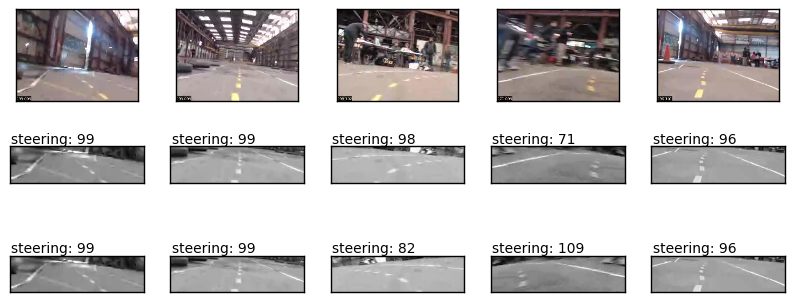

In [47]:
def image_hflip(img, label):
    '''
    Randomly flip image along horizontal axis: 1/2 chance that the image will be flipped
    img: original image in array type
    label: steering angle value of the original image
    '''
    choice = np.random.choice([0,1])
    if choice == 1:
            img = cv2.flip(img, 1)
            delta_label = label - 90
            label = 90 - delta_label 
    
    return (img, label)


#Try horizontal flip on 5 images
col, row = [0, 0]
_, ax = plt.subplots(3, 5, figsize=(10, 4))

for i, idx in enumerate(idx_list[0:5]):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img_rgb)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)[:,:,0]
    img_gray = img_gray[140:227, :]
    ax[row+1, col].imshow(img_gray, cmap='gray')
    steering = log_vid1[idx, 1]
    title_ = 'steering: {}'.format(steering)
    ax[row+1, col].text(3, -8, title_, fontsize=10, color='black')
    ax[row+1, col].set_xticks([])
    ax[row+1, col].set_yticks([])
    
    steering = int( log_vid1[idx, 1] )
    img_gray_flip, steering = image_hflip(img_gray, steering)
    title_ = 'steering: {}'.format(steering)
    ax[row+2, col].text(3, -8, title_, fontsize=10, color='black')
    ax[row+2, col].imshow(img_gray_flip, cmap='gray')
    ax[row+2, col].set_xticks([])
    ax[row+2, col].set_yticks([])
    if col == 4:
        col, row = 0, row+3
    else:
        col = col + 1
plt.show()

In [ ]:
## Lighting

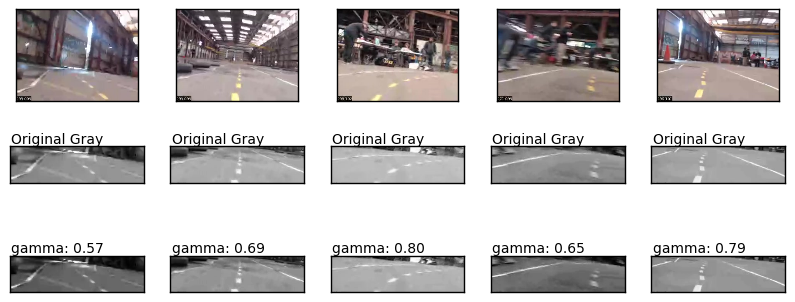

In [74]:
def gamma_transform(img, label):
    '''
    Adjust the brightness of the image
    img: original image in array type
    label: steering angle value of the original image
    '''
    gamma = np.random.uniform(low=0.2, high=1.0, size=None)
    inv_gamma = 1.0/gamma
    img = 255 *(img/255.)**(inv_gamma)
    
    return (img, gamma)



#Try vertical flip on 5 images
col, row = [0, 0]
_, ax = plt.subplots(3, 5, figsize=(10, 4))

for i, idx in enumerate(idx_list[0:5]):
    img_adress = vid1_dir+log_vid1[idx, 0]
    img = cv2.imread(img_adress)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax[row, col].imshow(img_rgb)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    img_gray = img_ycrcb[:,:,0]
    img_gray = img_gray[140:227, :]
    ax[row+1, col].imshow(img_gray, cmap='gray')
    title_ = 'Original Gray'
    ax[row+1, col].text(3, -8, title_, fontsize=10, color='black')
    ax[row+1, col].set_xticks([])
    ax[row+1, col].set_yticks([])
    
    img_gamma, gamma = gamma_transform(img_ycrcb, None)
    img_gray = img_gamma[:,:,0]
    img_gray = img_gray[140:227, :]
    ax[row+2, col].imshow(img_gray, cmap='gray')
    title_ = 'gamma: {:.2f}'.format(gamma)
    ax[row+2, col].text(3, -8, title_, fontsize=10, color='black')
    ax[row+2, col].set_xticks([])
    ax[row+2, col].set_yticks([])
    col = col + 1
plt.show()

In [90]:
a =[90, 89, 88, 12, 110, 105, 150]
b= np.clip(a, 80, 110)
print(b)

[ 90  89  88  80 110 105 110]
